In [1]:
#案例：假设你是一家餐厅的CEO，正在考虑开一家分店，根据该城市的人口数据预测其利润。

In [2]:
#Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#绝对路径
path="/home/alex/test/NG_exercise/ex1_linearRegression/ex1data1.txt"
#header=None使用文件默认标题，header=2表示第三行是数据，第二行是标题栏
data=pd.read_csv(path, header=None, names=['Population','Profits'])
data.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profits
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
data.tail()#后五行

,Population,Profits
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [5]:
data.info()#数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profits       97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


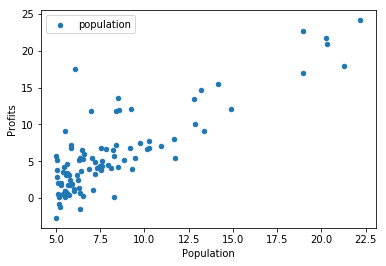

In [6]:
#遇到bug，x,y轴既然命名标签，赋值传递时候就得一致
data.plot.scatter('Population','Profits',label='population') 
plt.show()

In [7]:
data.insert(0,'one',1)
data.head()

,one,Population,Profits
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
# tempdata=data.iloc[0:3,:] #只取前三行
tempdata=data.iloc[0:3,0:2] #只取前三行,1,2列
# tempdata=data.iloc[:,1:3] #只取1,2列
tempdata.head()

,one,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186


In [9]:
tempdata.shape

(3, 2)

In [10]:
tempdata.values

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186]])

In [11]:
X = data.iloc[:,0:-1]#X,Y是我们真实需要的数据
X.head()

,one,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
X.shape

(97, 2)

In [13]:
y=data.iloc[: ,2]#等价于Y=data.iloc[:,-1]，只取最后一列
y.shape  
#这里是生成的是Series，我们需要的是DataFrame格式

(97,)

In [14]:
y=y.values.reshape(97,1)#遇到bug原来代码是y=y.reshape(97,1)
y.shape

(97, 1)

In [15]:
def cost_function(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [16]:
#矩阵各种乘法总结：
#numpy中：     *,数学中的点乘, np.dot(a, b)矩阵相乘
#tensorflow中： * 或者 tf.multiply(a, b) 点乘， tf.matmul(a, b) 矩阵相乘

In [17]:
theta=np.zeros((2, 1))
theta.shape
#Pandas中的两种数据类型：series, dataframe真很难转化

(2, 1)

In [18]:
cost_init=cost_function(X, y, theta)
cost_init.values[0]  #这里用到values提取数值位

32.072733877455676

In [19]:
def gradient_descent(x, y, theta, alpha, inters):
    costs = []
    
    for i in range(iters):
        theta = theta - alpha / len(X) * (X.T @ (X@theta - y)) 
        cost = cost_function(X, y, theta)
        costs.append(cost)
    
        if i % 100 == 0:
            print(cost.values)
        
    return theta,costs

In [20]:
alpha = 0.02
iters = 2000

theta,costs = gradient_descent(X, y, theta, alpha, iters)

[16.76964237]
[5.17066809]
[4.81384022]
[4.6405596]
[4.55641211]
[4.51554891]
[4.49570517]
[4.48606877]
[4.4813892]
[4.47911673]
[4.47801319]
[4.4774773]
[4.47721706]
[4.47709068]
[4.47702931]
[4.47699951]
[4.47698504]
[4.47697801]
[4.4769746]
[4.47697294]


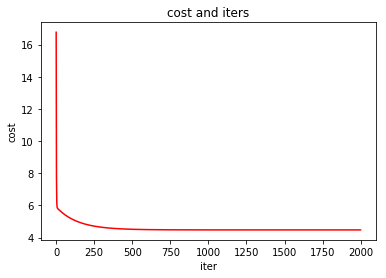

In [21]:
fig,ax = plt.subplots()  #fig,ax分别指的是图像和实例
ax.plot(np.arange(iters), costs, 'r')
ax.set(xlabel='iter',
       ylabel='cost',
       title='cost and iters')  #单词拼错了，xlabel
plt.show()

In [47]:
theta.values

array([[-3.8928815 ],
       [ 1.19274237]])

In [66]:
print(type(X))  #多次因为类型问题入坑,DataFrame才有values
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


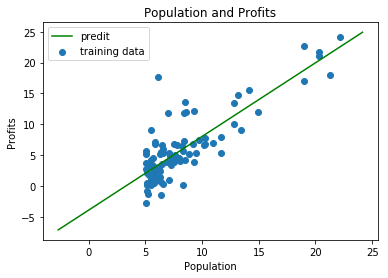

In [74]:
#linspace生成线性等分向量
x = np.linspace(y.min(), y.max(), 100)
y_profits = theta.values[0,0] + theta.values[1,0] * x

fig, ax = plt.subplots()
ax.scatter(X.values[:,1], y, label='training data')
ax.plot(x, y_profits, 'g', label='predit')
ax.legend() #legend显示标签(刻印文字)
ax.set(xlabel='Population',
       ylabel='Profits',
       title='Population and Profits')
plt.show()